## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics




```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
100% 21.5M/21.5M [00:00<00:00, 45.8MB/s]
New https://pypi.org/project/ultralytics/8.2.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/xla-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [ ]:
!ls /content/runs/detect/train/

args.yaml					    P_curve.png		train_batch181.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch182.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1715806726.bd1e9cb46b12.2578.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch180.jpg	weights


/content


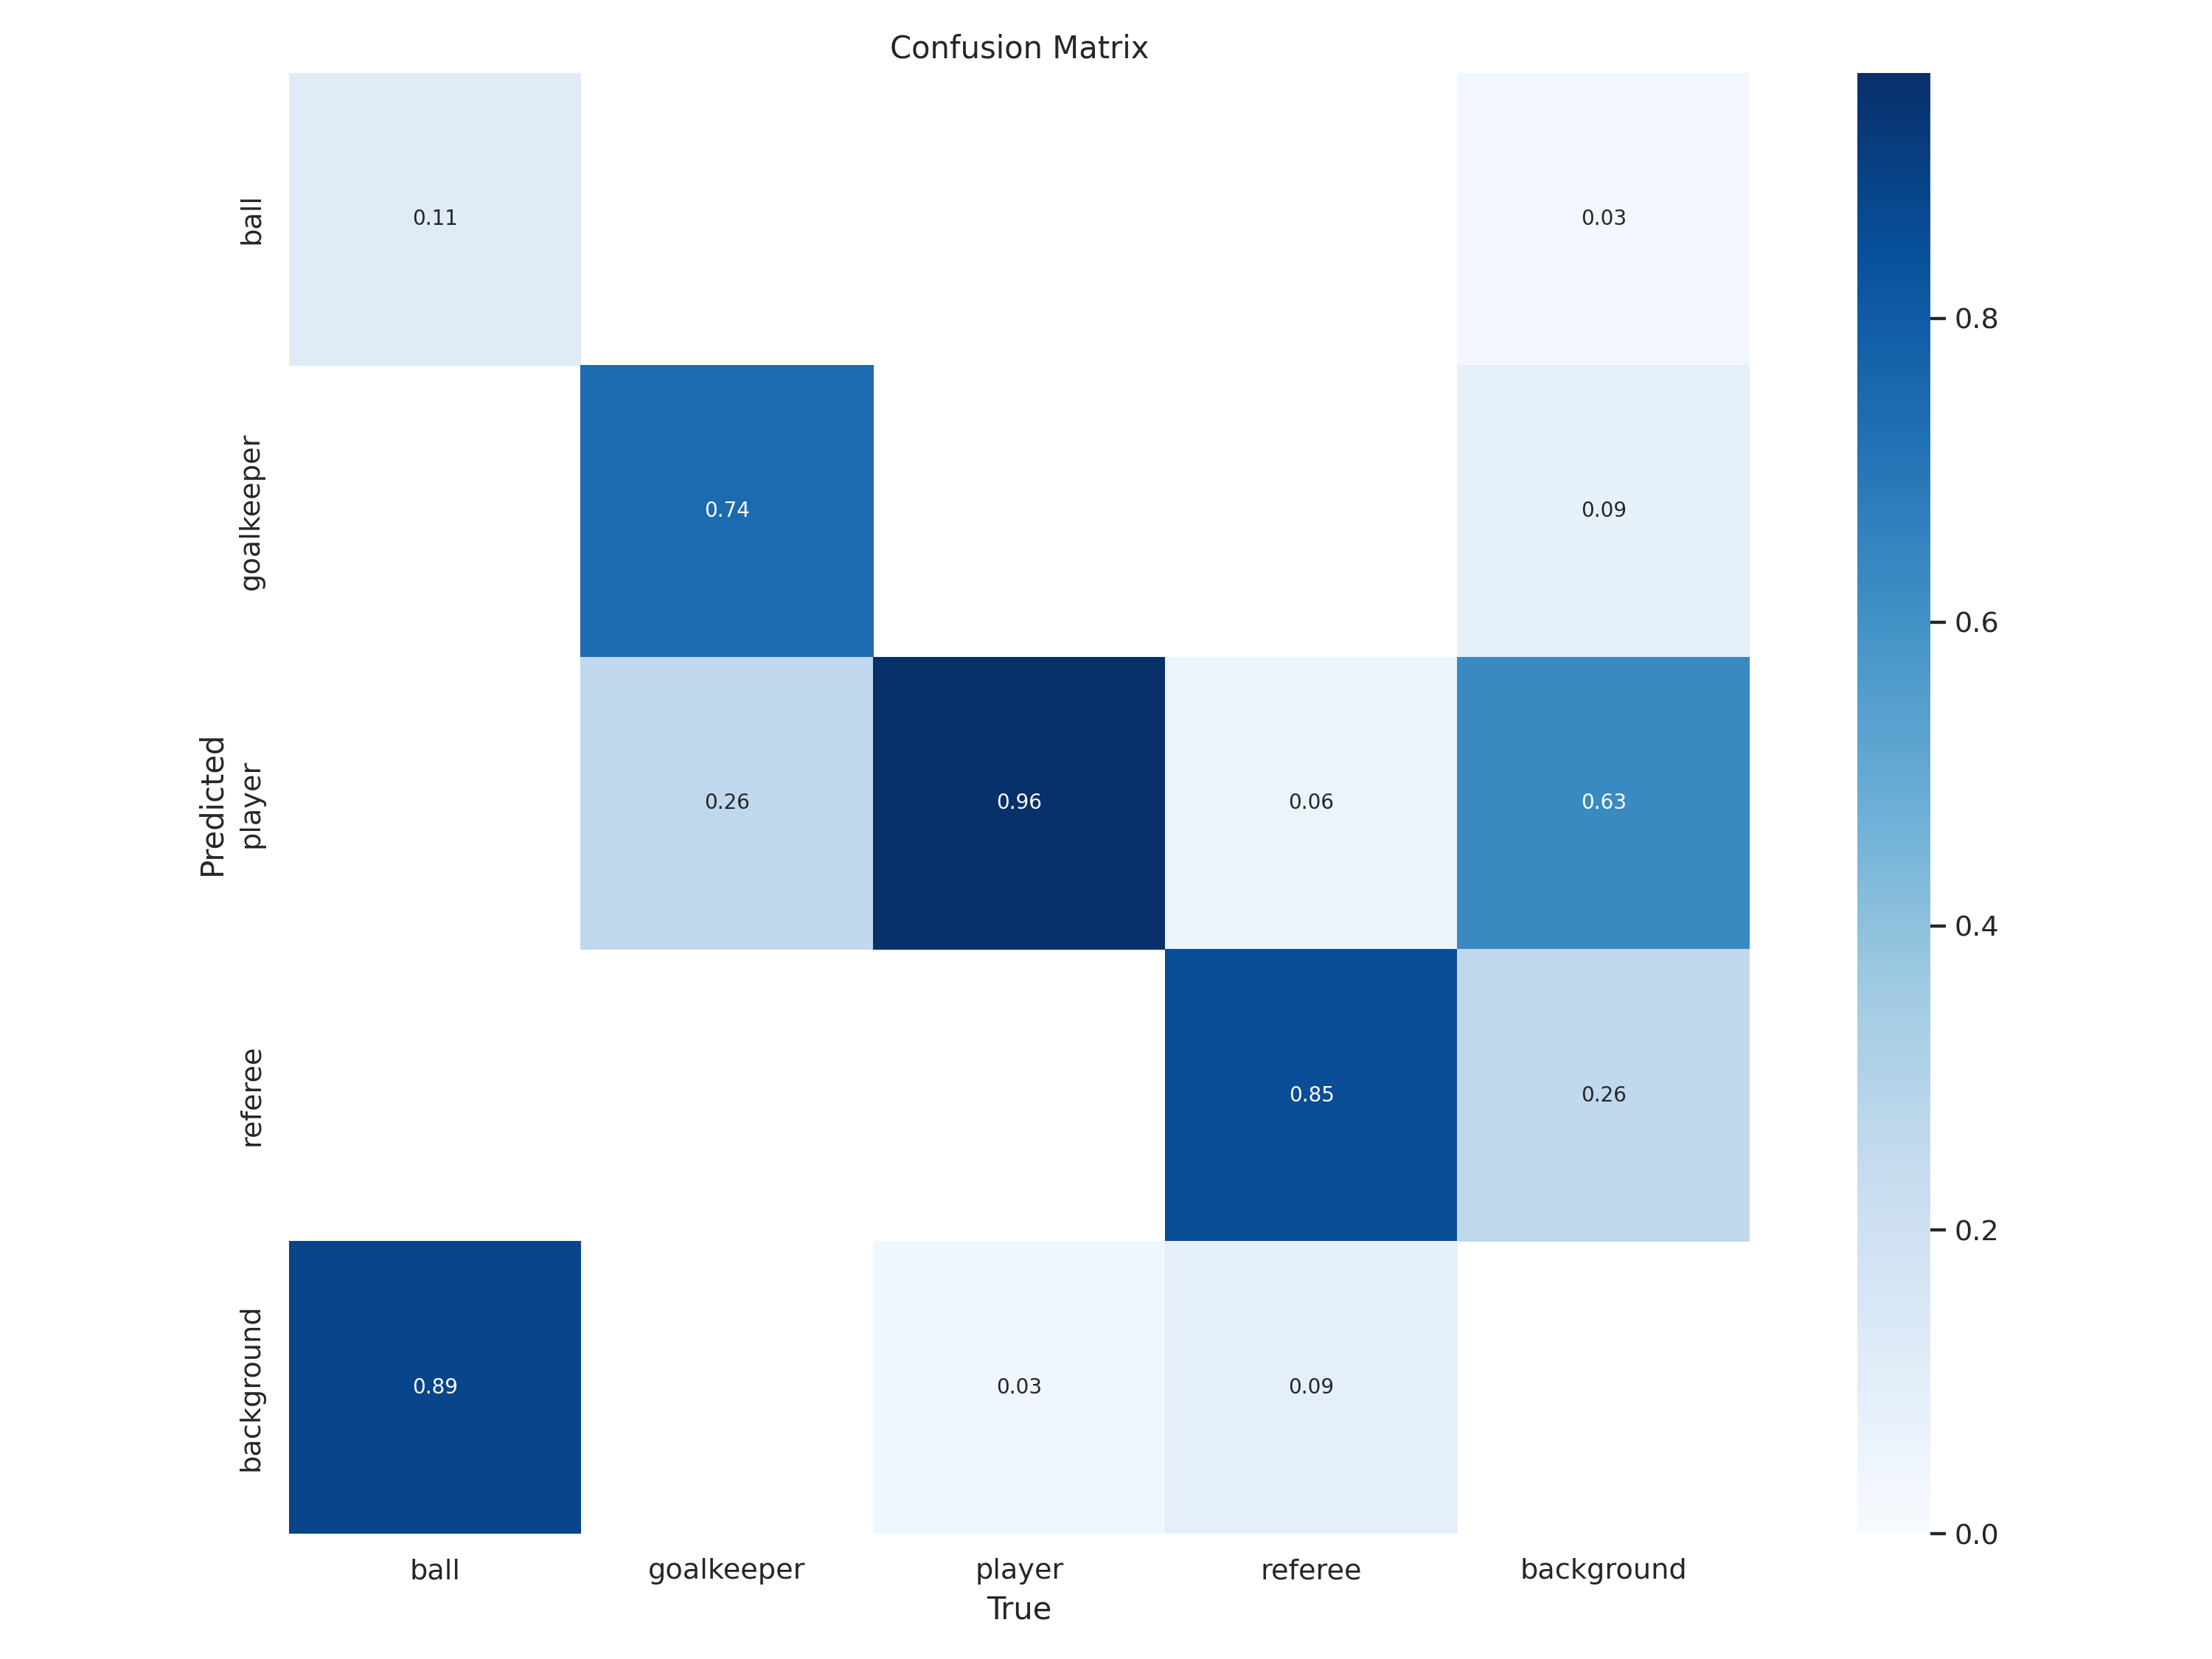

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


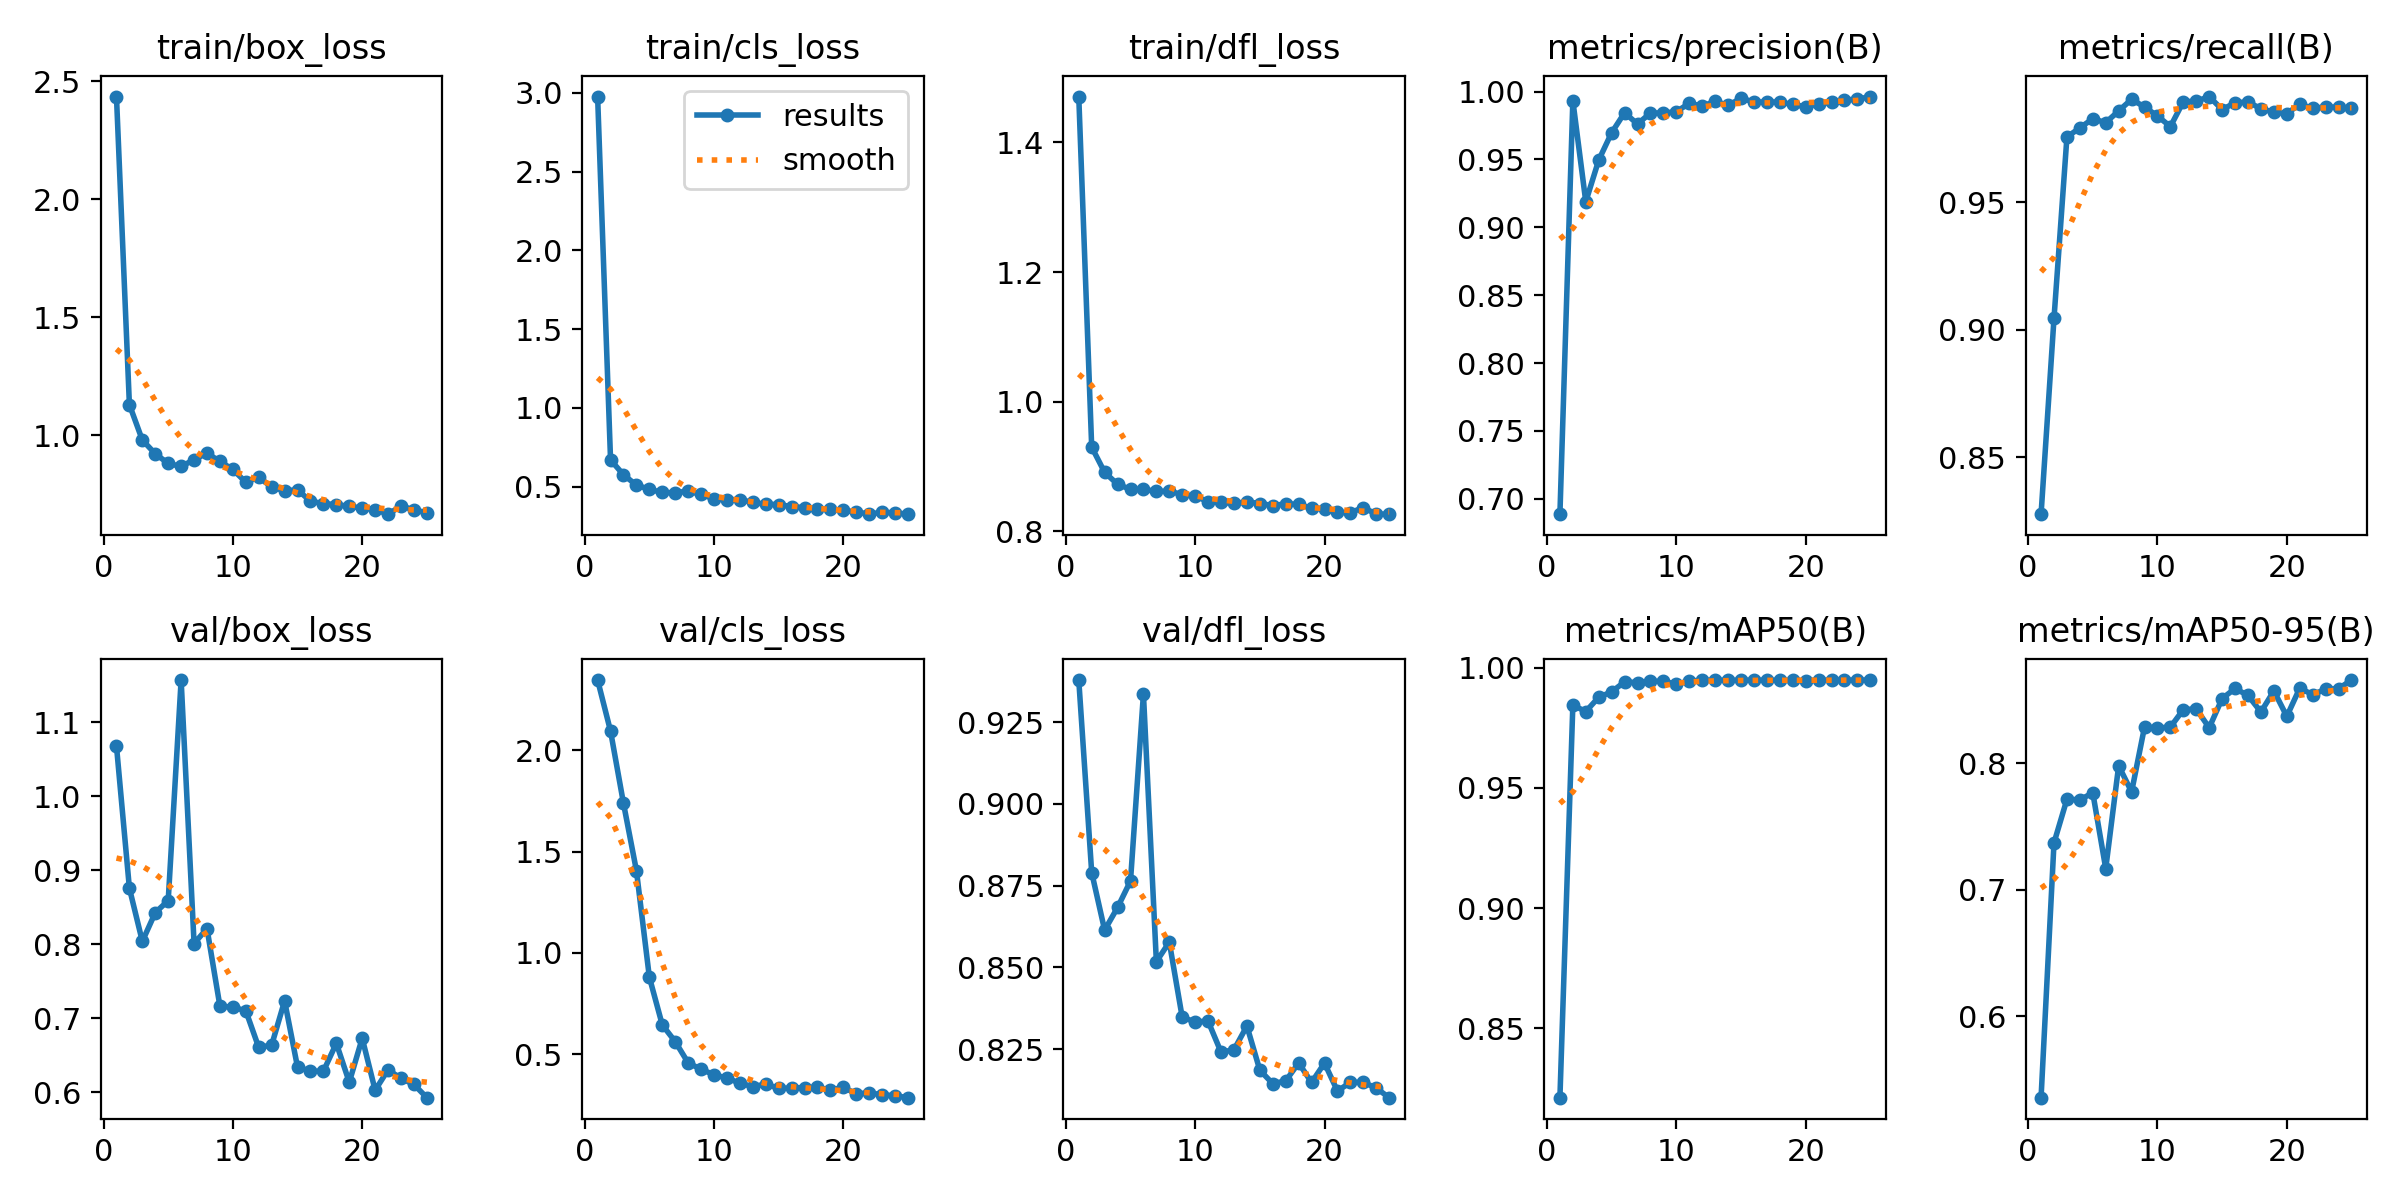

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


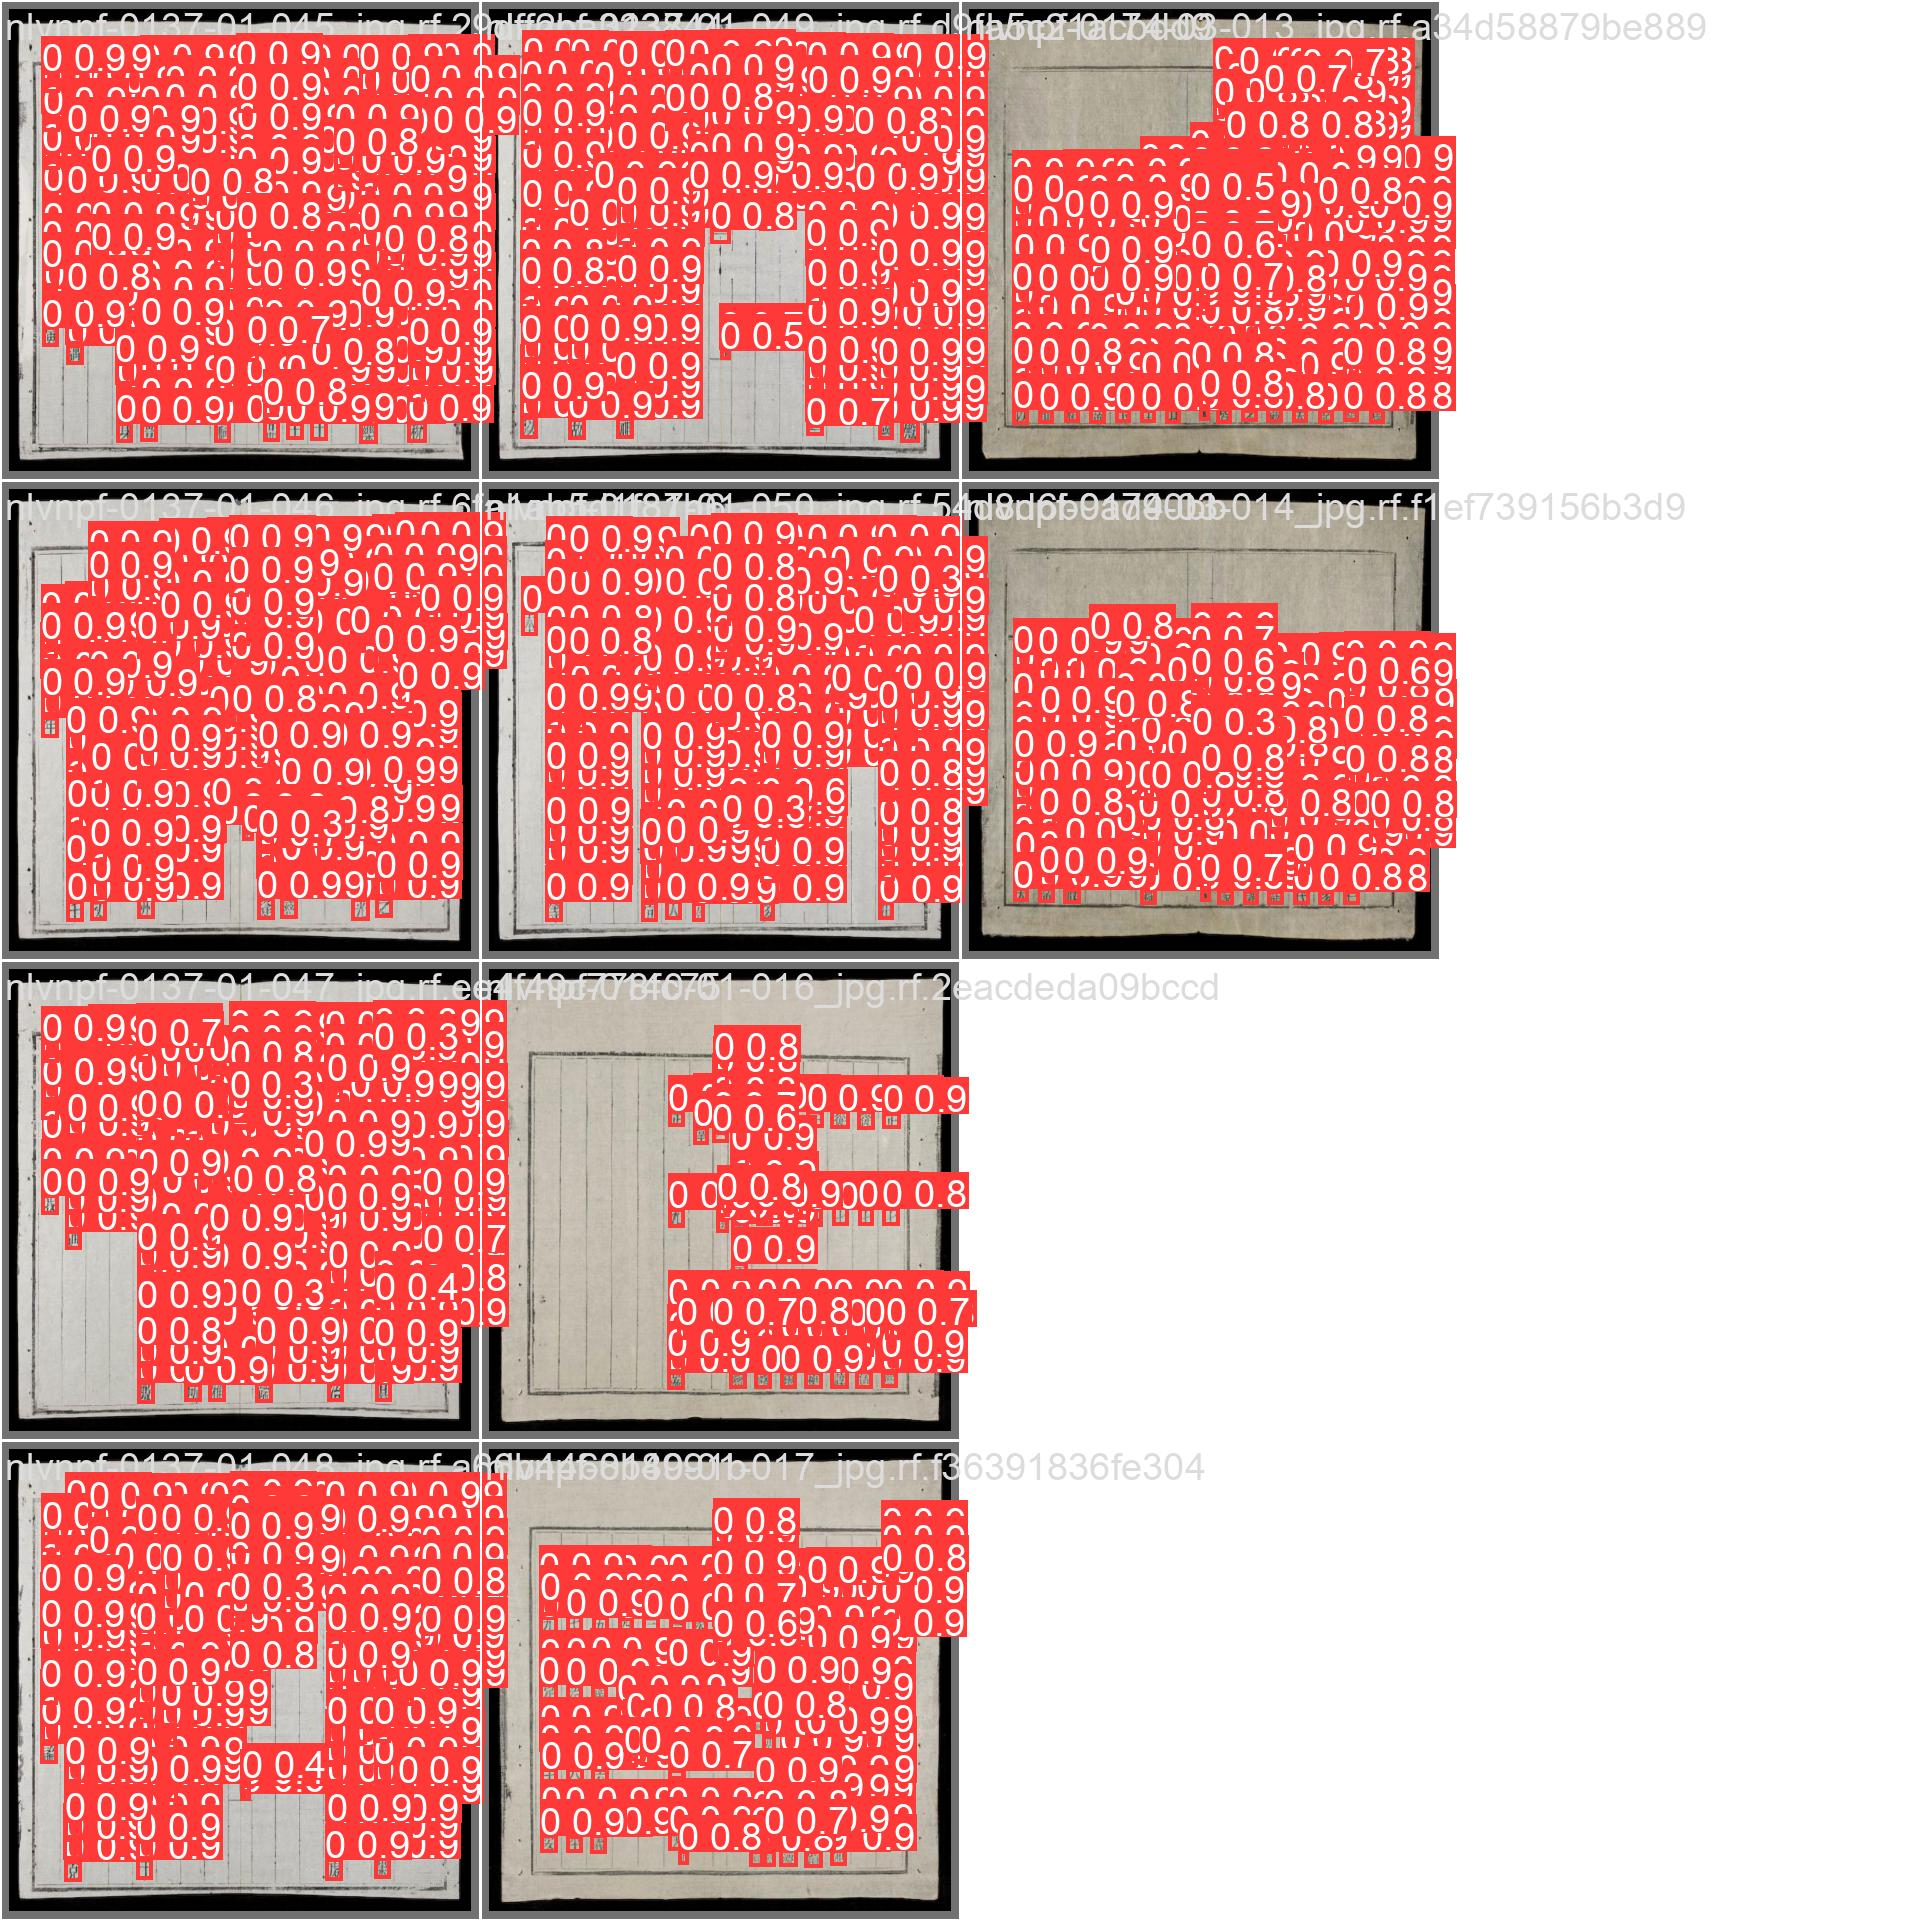

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

[Errno 2] No such file or directory: '{HOME}'
/content
/bin/bash: line 1: yolo: command not found


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/10 /content/xla-1/valid/images/nlvnpf-0137-01-045_jpg.rf.29dff2ba323844a9f84eddee65a079da.jpg: 800x800 223 0s, 23.4ms
image 2/10 /content/xla-1/valid/images/nlvnpf-0137-01-046_jpg.rf.6fa1ab5d1f81b6aacf66443ebbe8ad14.jpg: 800x800 244 0s, 22.7ms
image 3/10 /content/xla-1/valid/images/nlvnpf-0137-01-047_jpg.rf.ee4f49c778fc757d177c25110d8cc0a5.jpg: 800x800 204 0s, 22.6ms
image 4/10 /content/xla-1/valid/images/nlvnpf-0137-01-048_jpg.rf.a66b4468b8991bfd6649f2beedf33662.jpg: 800x800 188 0s, 22.5ms
image 5/10 /content/xla-1/valid/images/nlvnpf-0137-01-049_jpg.rf.d9fa5c21acbdd9e80c7d93aa3b512e5a.jpg: 800x800 176 0s, 22.6ms
image 6/10 /content/xla-1/valid/images/nlvnpf-0137-01-050_jpg.rf.54d8d6b9ad90bbe339ee5a7db12b31a6.jpg: 800x800 194 0s, 22.5ms
image 7/10 /content/xla

**NOTE:** Let's take a look at few results.

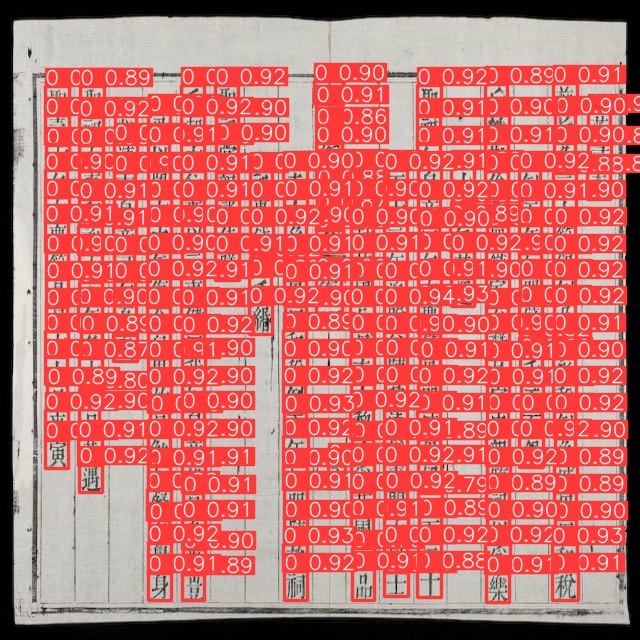

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/nlvnpf-0137-01-045_jpg.rf.29dff2ba323844a9f84eddee65a079da.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/duc-nhywk/xla-rvuzg/1
Share your model with the world at: https://universe.roboflow.com/duc-nhywk/xla-rvuzg/model/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/valid/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict("/content/xla-1/valid/images/nlvnpf-0137-01-045_jpg.rf.29dff2ba323844a9f84eddee65a079da.jpg", confidence=40, overlap=30).json()
pred

running inference on nlvnpf-0137-01-046_jpg.rf.6fa1ab5d1f81b6aacf66443ebbe8ad14.jpg


{'predictions': [{'x': 531.0,
   'y': 319.0,
   'width': 24.0,
   'height': 30.0,
   'confidence': 0.9211930632591248,
   'class': '0',
   'class_id': 0,
   'detection_id': '8c352399-915a-4413-bf0f-2d8df3d0a5bb',
   'image_path': '/content/xla-1/valid/images/nlvnpf-0137-01-045_jpg.rf.29dff2ba323844a9f84eddee65a079da.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 498.0,
   'y': 588.5,
   'width': 24.0,
   'height': 29.0,
   'confidence': 0.9211830496788025,
   'class': '0',
   'class_id': 0,
   'detection_id': 'f39daa1b-52ca-49dc-b134-d7deae4d57f8',
   'image_path': '/content/xla-1/valid/images/nlvnpf-0137-01-045_jpg.rf.29dff2ba323844a9f84eddee65a079da.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 497.5,
   'y': 265.5,
   'width': 23.0,
   'height': 27.0,
   'confidence': 0.9182320833206177,
   'class': '0',
   'class_id': 0,
   'detection_id': 'e4a37e11-1876-4be2-b3ef-52263611fcc7',
   'image_path': '/content/xla-1/valid/images/nlvnpf-0137-01-045_jpg.rf.29d

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.